In [1]:
!pip install dtaidistance

     |████████████████████████████████| 797 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.6-cp37-cp37m-linux_x86_64.whl size=1593621 sha256=5dfe4ba163dca315282ea5b61941cd4ae8a7407b22defb1fb09dd87bc8ff5033
  Stored in directory: /root/.cache/pip/wheels/a4/04/e5/ff7fd821276e7ec68893652d36b6a13f230ecdcafdc3283b3f
Successfully built dtaidistance
     |████████████████████████████████| 6.6 MB 4.8 MB/s 
     |████████████████████████████████| 3.3 MB 38.6 MB/s 
     |████████████████████████████████| 9.8 MB 32.4 MB/s 
     |████████████████████████████████| 34.5 MB 16 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

In [3]:
from dtaidistance.subsequence.dtw import subsequence_alignment
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

def plotAlign(x, y, path):
  a = []
  b = []
  for p in reversed(path):
    a.append(x[p[0]])
    b.append(y[p[1]])

  plt.figure(figsize=(10,5))
  plt.plot(a)
  plt.plot(b)
  plt.show()


In [5]:
df = pd.read_csv("StarLightCurves.tsv", sep=":", header=None)
s1 = np.array(df[0][0].split(","), dtype=float)
s2 = np.array(df[0][1].split(","), dtype=float)

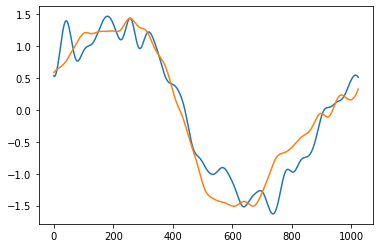

In [6]:
plt.plot(s1)
plt.plot(s2)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e4bbaf490>,
       dtype=object))

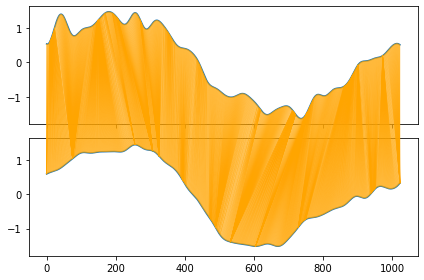

In [ ]:
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)

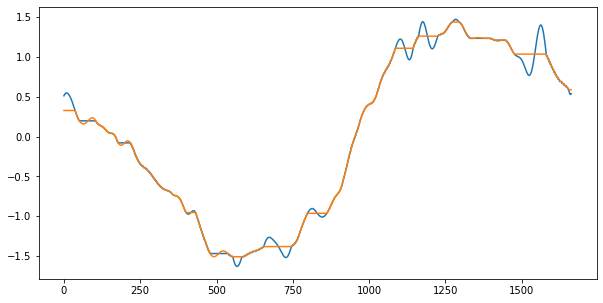

In [ ]:
plotAlign(s1, s2, path)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bd5231610>,
       dtype=object))

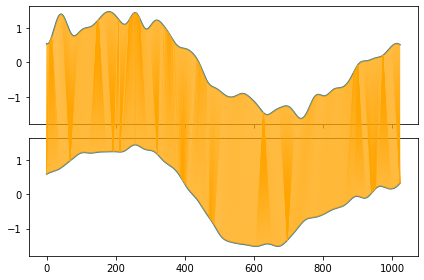

In [7]:
path = dtw.warping_path(s1, s2, window=25)
dtwvis.plot_warping(s1, s2, path)

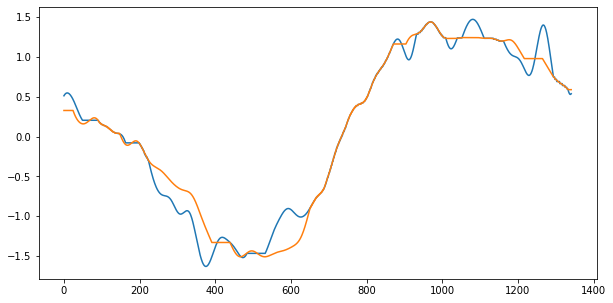

In [8]:
plotAlign(s1, s2, path)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bd1f978d0>,
       dtype=object))

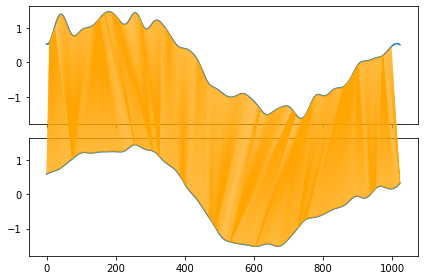

In [9]:
path = dtw.warping_path(s1, s2, psi=25)
dtwvis.plot_warping(s1, s2, path)

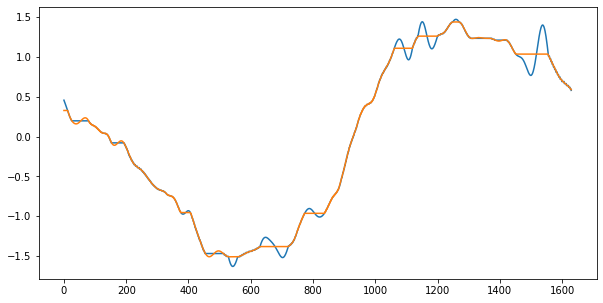

In [10]:
plotAlign(s1, s2, path)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bd0313c50>,
       dtype=object))

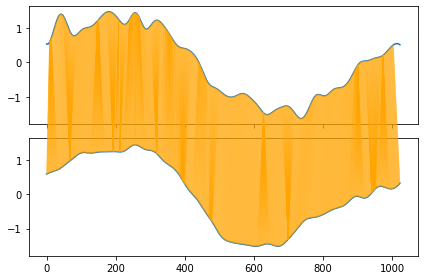

In [11]:
path = dtw.warping_path(s1, s2, window=20, psi=20)
dtwvis.plot_warping(s1, s2, path)

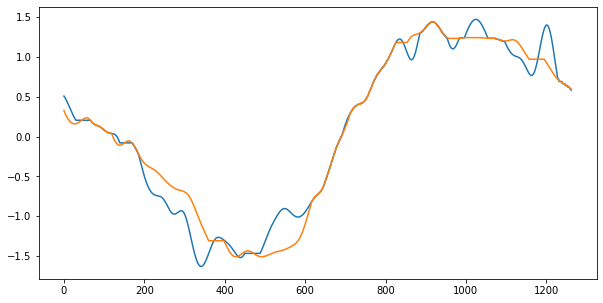

In [12]:
plotAlign(s1, s2, path)

In [13]:
distance = dtw.distance(s1, s2)
print("Distancia: ", distance)

Distancia:  2.785299098015069


In [ ]:
distance = dtw.distance(s1, s2, use_pruning=True)
print("Distancia: ", distance)

Distancia:  2.785299098015069


In [ ]:
distance = dtw.distance(s1, s2, window=25, use_pruning=True)
print("Distancia: ", distance)

Distancia:  6.543191403377723


In [ ]:
distance = dtw.distance_fast(s1, s2, use_pruning=True)
print("Distancia: ", distance)

Distancia:  2.785299098015069


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f0a216b34d0>])

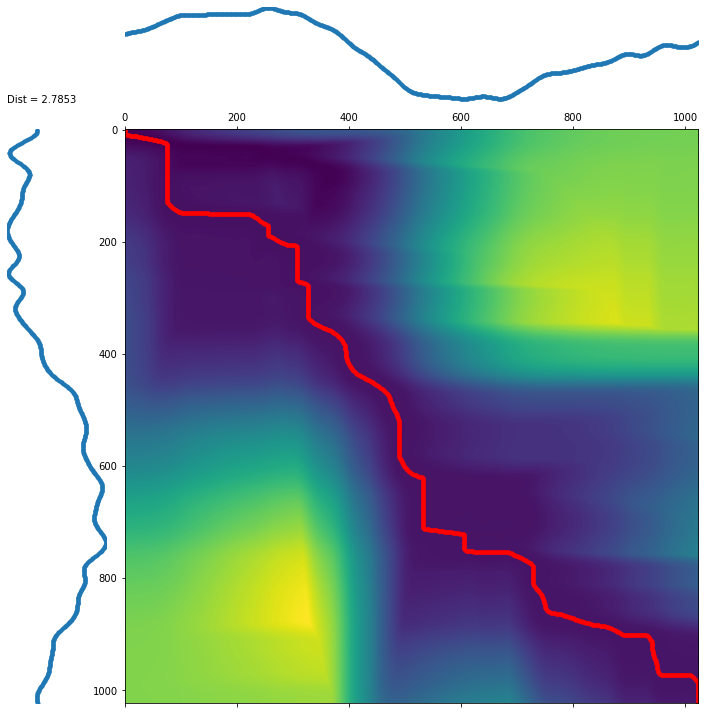

In [ ]:
distance, paths = dtw.warping_paths(s1, s2)

dtwvis.plot_warpingpaths(s1, s2, paths)

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f1e4a87ea50>])

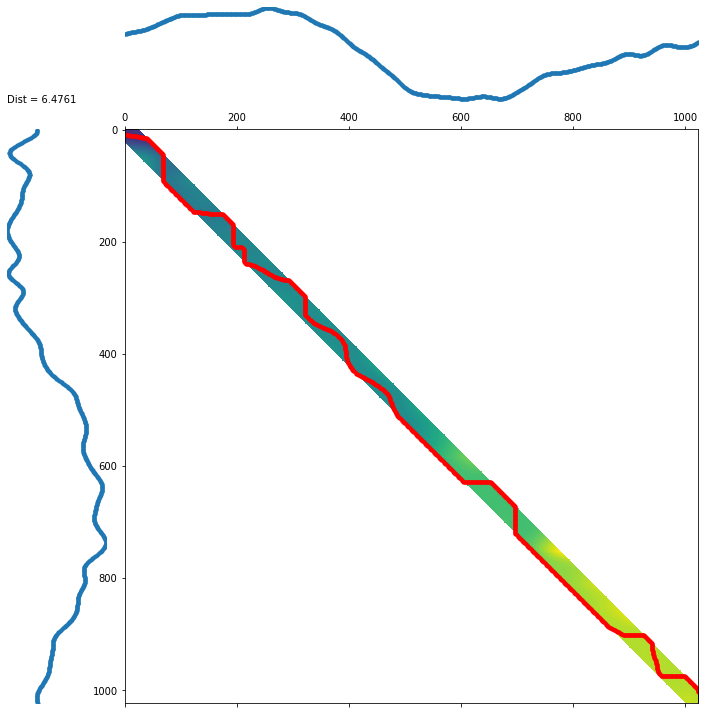

In [ ]:
d, paths = dtw.warping_paths(s1, s2, window=25, psi=20)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [15]:
timeseries = np.array([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])
ds = dtw.distance_matrix(timeseries, compact=True)
print(ds)

array('d', [1.4142135623730951, 1.0, 1.0])


In [16]:
timeseries = np.array([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])
ds = dtw.distance_matrix_fast(timeseries, compact=False)
print(ds)

[[0.         1.41421356 1.        ]
 [1.41421356 0.         1.        ]
 [1.         1.         0.        ]]
